# Visualizing with the `ggplot`
***

In [ ]:
# pip install -U ggplot
# or 
! conda install -y -c conda-forge ggplot
# or
# pip install git+https://github.com/yhat/ggplot.git

In [2]:
%matplotlib inline

# standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I've got style,
# miles and miles
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.0)
cp = sns.color_palette()

In [4]:
#Please go to .../site-packages/ggplot/stats/smoothers.py and change

# from pandas.lib import Timestamp
# to

from pandas import Timestamp
from ggplot import *

ImportError: cannot import name 'Timestamp'

<br/>

### Thing 1: Line Chart (with many lines)
***

In [5]:
ts = pd.read_csv('data/ts.csv')

# casting to datetime is important for
# ensuring plots "just work"
ts = ts.assign(dt = pd.to_datetime(ts.dt))
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [6]:
# in matplotlib-land, the notion of a "tidy"
# dataframe matters not
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


NameError: name 'ggplot' is not defined

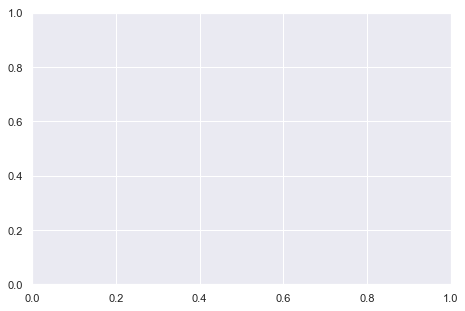

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

g = ggplot(ts, aes(x='dt', y='value', color='kind')) + \
        geom_line(size=2.0) + \
        xlab('Date') + \
        ylab('Value') + \
        ggtitle('Random Timeseries')
g

<br/>

### Thing 2: Scatter
***

In [ ]:
df = pd.read_csv('data/iris.csv')
df.head()

In [ ]:
g = ggplot(df, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        geom_point(size=40.0) + \
        ggtitle('Petal Width v. Length -- by Species')
g

<br/>

### Thing 3: Trellising the Above
***

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

g = ggplot(ts, aes(x='dt', y='value', color='kind')) + \
        geom_line(size=2.0) + \
        facet_wrap(x='kind', ncol=2) + \
        ggtitle('Random Timeseries')
g

In [ ]:
g = ggplot(df, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        facet_grid(y='species') + \
        geom_point(size=40.0)
g

tmp_n = df.shape[0] - df.shape[0]/2

df['random_factor'] = np.random.permutation(['A'] * tmp_n + ['B'] * (df.shape[0] - tmp_n))
df.head()

g = ggplot(df, aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        facet_grid(x='random_factor', y='species') + \
        geom_point(size=40.0)
g

<br/>

### Thing 4: Visualizing Distributions (Boxplot and Histogram)
***

In [ ]:
g = ggplot(df, aes(x='species',
                   y='petalWidth',
                   fill='species')) + \
        geom_boxplot() + \
        ggtitle('Distribution of Petal Width by Species')
g

In [ ]:
g = ggplot(df, aes(x='petalWidth',
                   fill='species')) + \
        geom_histogram() + \
        ylab('Frequency') + \
        ggtitle('Distribution of Petal Width by Species')
g

<br/>

### Thing 5: Bar Chart
***

In [ ]:
df = pd.read_csv('data/titanic.csv')
df.head()

In [ ]:
dfg = df.groupby(['survived', 'pclass']).agg({'fare': 'mean'})
dfg

In [ ]:
g = ggplot(df, aes(x='class', y='fare')) + \
        geom_bar()
g

In [ ]:
g = ggplot(df, aes(x='class', weight='fare')) + \
        geom_bar()
g

In [ ]:
df.groupby(['class', 'survived']).\
               agg({'fare': 'mean'}).\
               reset_index()

In [ ]:
g = ggplot(df.groupby(['class', 'survived']).\
               agg({'fare': 'mean'}).\
               reset_index(), aes(x='class',
                                  fill='factor(survived)',
                                  weight='fare',
                                  y='fare')) + \
        geom_bar() + \
        ylab('Avg. Fare') + \
        xlab('Class') + \
        ggtitle('Fare by survival and class') 
g

In [ ]:
g = ggplot(df.groupby(['class', 'survived']).\
               agg({'fare': 'mean'}).\
               reset_index(), aes(x='class',
                                  fill='factor(survived)',
                                  y='fare')) + \
        geom_bar() + \
        ylab('Avg. Fare') + \
        xlab('Class') + \
        ggtitle('Fare by survival and class') 
g

In [ ]:
# # in R, I believe you'd do something like this:

ggplot(df, aes(x=factor(survived), y=fare) + stat_summary_bin(aes(fill=factor(survived)),
                     fun.y="mean",
                     geom="bar") + facet_wrap(~class)
    
# # damn ggplot2 is awesome...